# preprocessing 

### importing libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
import shutup;shutup.please()

### parsing .csv file

In [2]:
df = pd.read_csv('b_depressed.csv')

### print 5 sample rows of the dataset

In [3]:
print(df.sample(5))

      Survey_id  Ville_id  sex  Age  Married  Number_children  \
1194        852       130    1   35        1                1   
848         907       162    1   28        1                5   
881        1314        78    1   47        1                2   
1247        962       138    1   35        1                6   
339         550       107    1   19        1                2   

      education_level  total_members  gained_asset  durable_asset  ...  \
1194                4              3      12540034       22861940  ...   
848                10              7      20651573       34753354  ...   
881                 1              5      28912201       22861940  ...   
1247                9              8      22261365       19218445  ...   
339                 8              5      28912201       22861940  ...   

      incoming_salary  incoming_own_farm  incoming_business  \
1194                0                  0                  0   
848                 0                 

### .describe returns Count, Mean, standard deviation, Minimum, Q1, Median, Q3, and Maximum

In [4]:
print("information about the data set (.describe result) : \n",df.describe(),"\n") 

information about the data set (.describe result) : 
         Survey_id     Ville_id          sex          Age      Married  \
count  1429.00000  1429.000000  1429.000000  1429.000000  1429.000000   
mean    715.00000    76.286214     0.918125    34.777467     0.772568   
std     412.66108    66.444012     0.274271    13.986219     0.419320   
min       1.00000     1.000000     0.000000    17.000000     0.000000   
25%     358.00000    24.000000     1.000000    25.000000     1.000000   
50%     715.00000    57.000000     1.000000    30.000000     1.000000   
75%    1072.00000   105.000000     1.000000    42.000000     1.000000   
max    1429.00000   292.000000     1.000000    91.000000     1.000000   

       Number_children  education_level  total_members  gained_asset  \
count      1429.000000      1429.000000    1429.000000  1.429000e+03   
mean          2.883135         8.687194       4.969209  3.363448e+07   
std           1.874472         2.923532       1.786317  2.003854e+07   


### print a list of coloumns

In [5]:
print("coloumns in dataset:\n ",df.columns.to_list(),"\n")

coloumns in dataset:
  ['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members', 'gained_asset', 'durable_asset', 'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary', 'incoming_own_farm', 'incoming_business', 'incoming_no_business', 'incoming_agricultural', 'farm_expenses', 'labor_primary', 'lasting_investment', 'no_lasting_investmen', 'depressed'] 



### we drop uninteresting columns from our dataset

In [6]:
df=df.drop('Survey_id',axis=1)
df=df.drop('Ville_id',axis=1)

### returns datatypes of each coloumn

In [7]:
print("data types of each coloumn:\n ",df.dtypes,"\n")

data types of each coloumn:
  sex                        int64
Age                        int64
Married                    int64
Number_children            int64
education_level            int64
total_members              int64
gained_asset               int64
durable_asset              int64
save_asset                 int64
living_expenses            int64
other_expenses             int64
incoming_salary            int64
incoming_own_farm          int64
incoming_business          int64
incoming_no_business       int64
incoming_agricultural      int64
farm_expenses              int64
labor_primary              int64
lasting_investment         int64
no_lasting_investmen     float64
depressed                  int64
dtype: object 



### counts number of missing values in each coloumn and returns the sum 

In [8]:
print("number of missing values in each coloumn:\n ", df.isnull().sum(),"\n")

number of missing values in each coloumn:
  sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64 



### here we see that there are null values in the no_lasting_investmen coloumn.\n we will fill in the missing cells with the mean of the present values in the coloumn

### print mean of 'no_lasting_investmen'

In [9]:
print("mean of no_lasting_investmen coloumn: \n",df['no_lasting_investmen'].mean(),'\n')

mean of no_lasting_investmen coloumn: 
 33603850.543647975 



### fill in missing values of no_lasting_investmen with the mean value of the present data in the coloumn

In [10]:
df.fillna({'no_lasting_investmen': df['no_lasting_investmen'].mean()}, inplace=True)
df.to_csv('output_file.csv', index=False)
df = pd.read_csv('output_file.csv')

### print number of missing values in each coloumn after filling in with mean

In [11]:
print("number of missing values in each coloumn after filling in with mean:\n ", df.isnull().sum(),"\n")

number of missing values in each coloumn after filling in with mean:
  sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64 



### correlation analysis on the data with heatmap

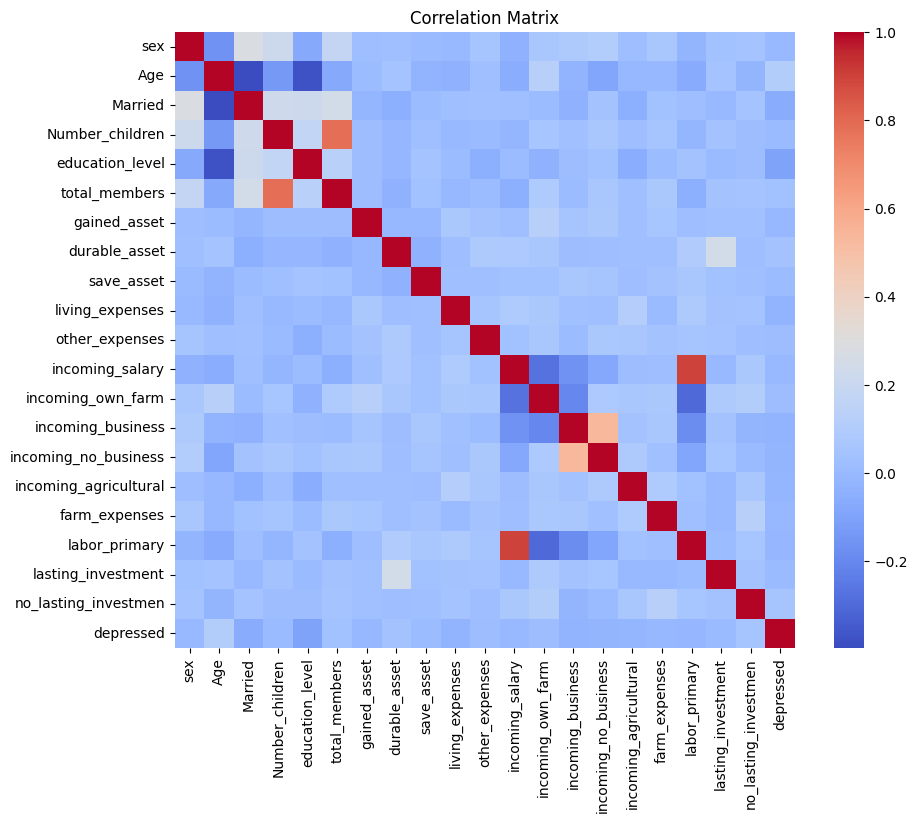

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#parsing .csv file
df = pd.read_csv("output_file.csv")

# Drop any non-numeric columns if necessary
numeric_df = df.select_dtypes(include=['float64', 'int64'])


# Calculating correlation matrix using => corr function
correlation_matrix=df.corr()


# visualize the correlation matrix using => heatmap function
plt.figure(figsize=(10, 8))
# annot => displaying the correlation values. 
# cmap=> sets the color map to 'coolwarm' which ranges from blue (negative correlation) to red (positive correlation), making it easier .
# fmt => display two decimal places for better readability.
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### finding optimal Hyperparameters for random forrest to perform feature selection

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Load your dataset from CSV
df = pd.read_csv("output_file.csv")

# Assuming 'target_column' is the name of the column containing the target variable
X = df.drop('depressed', axis=1)  # Features
y = df['depressed']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),  # Random integer between 2 and 10
    'min_samples_leaf': randint(1, 5),    # Random integer between 1 and 4
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
                                    param_distributions=param_dist,
                                    n_iter=50,  # Number of parameter settings that are sampled
                                    scoring='accuracy',
                                    cv=5,
                                    verbose=1,
                                    n_jobs=-1,
                                    random_state=42)

# Perform the randomized search on training data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:")
print(random_search.best_params_)
print("Best accuracy on validation data: {:.4f}".format(random_search.best_score_))

# Evaluate the best model on the test set
best_rf_classifier = random_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.4f}".format(accuracy))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy on validation data: 0.8233
Accuracy on test set: 0.8287


### Feature Selection Using wrapper method (Random Forest) utilizing the RandomOverSampler method to account for unbalanced dataset

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from imblearn.over_sampling import RandomOverSampler

# Splitting data into features and target

X = df.drop('depressed', axis=1)
y = df['depressed']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply random oversampling to the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(rf_classifier, k_features='best', forward=True, scoring='accuracy', cv=5)

# Fit the Sequential Feature Selector to the resampled training data
sfs.fit(X_train_resampled, y_train_resampled)

# Selected features
selected_features = list(X_train.columns[list(sfs.k_feature_idx_)])
print("Selected Features:", selected_features)

# Transforming the training and testing sets to contain only the selected features
X_train_selected = sfs.transform(X_train_resampled)
X_test_selected = sfs.transform(X_test)

# Train a new model using only the selected features
rf_classifier.fit(X_train_selected, y_train_resampled)

# Predicting with the new model
y_pred = rf_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Selected Features: ['sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members', 'gained_asset', 'durable_asset', 'save_asset', 'living_expenses', 'other_expenses', 'incoming_own_farm', 'incoming_business', 'incoming_no_business', 'incoming_agricultural', 'farm_expenses', 'labor_primary', 'lasting_investment', 'no_lasting_investmen']
Accuracy: 0.7937062937062938


### Feature Selection Using wrapper method (Random Forest) utilizing the RandomUnderSampler method to account for unbalanced data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from imblearn.under_sampling import RandomUnderSampler

# Splitting data into features and target

X = df.drop('depressed', axis=1)
y = df['depressed']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply random undersampling to the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(rf_classifier, k_features='best', forward=True, scoring='accuracy', cv=5)

# Fit the Sequential Feature Selector to the resampled training data
sfs.fit(X_train_resampled, y_train_resampled)

# Selected features
selected_features = list(X_train.columns[list(sfs.k_feature_idx_)])
print("Selected Features:", selected_features)

# Transforming the training and testing sets to contain only the selected features
X_train_selected = sfs.transform(X_train_resampled)
X_test_selected = sfs.transform(X_test)

# Train a new model using only the selected features
rf_classifier.fit(X_train_selected, y_train_resampled)

# Predicting with the new model
y_pred = rf_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Selected Features: ['sex', 'education_level', 'gained_asset', 'other_expenses', 'incoming_salary', 'incoming_business']
Accuracy: 0.5104895104895105


### Feature Selection Using wrapper method (Random Forest) utilizing Class-weight balancing to account for unbalanced data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Splitting data into features and target

X = df.drop('depressed', axis=1)
y = df['depressed']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier with balanced class weights
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(rf_classifier, k_features='best', forward=True, scoring='accuracy', cv=5)

# Fit the Sequential Feature Selector to the training data
sfs.fit(X_train, y_train)

# Selected features
selected_features = list(X_train.columns[list(sfs.k_feature_idx_)])
print("Selected Features:", selected_features)

# Transforming the training and testing sets to contain only the selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

# Train a new model using only the selected features
rf_classifier.fit(X_train_selected, y_train)

# Predicting with the new model
y_pred = rf_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Selected Features: ['sex', 'Age', 'Number_children', 'education_level', 'total_members', 'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary', 'incoming_business', 'farm_expenses', 'labor_primary', 'lasting_investment']
Accuracy: 0.8321678321678322


### Feature Selection Using wrapper method (Logistic Regression) utilizing the RandomOverSampler method to account for unbalanced data

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from imblearn.over_sampling import RandomOverSampler


# Load the dataset
df = pd.read_csv("output_file.csv")
# Splitting data into features and target

X = df.drop('depressed', axis=1)
y = df['depressed']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(solver='liblinear', random_state=42)

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(logreg_classifier, k_features='best', forward=True, scoring='accuracy', cv=5)

# Fit the Sequential Feature Selector to the resampled training data
sfs.fit(X_train_resampled, y_train_resampled)

# Selected features
selected_features = list(X_train.columns[list(sfs.k_feature_idx_)])
print("Selected Features:", selected_features)

# Transforming the training and testing sets to contain only the selected features
X_train_selected = sfs.transform(X_train_resampled)
X_test_selected = sfs.transform(X_test)

# Train a new model using Logistic Regression and only the selected features
logreg_classifier.fit(X_train_selected, y_train_resampled)

# Predicting with the new model
y_pred = logreg_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Selected Features: ['Age', 'Married', 'Number_children', 'education_level', 'total_members', 'incoming_business', 'incoming_no_business', 'labor_primary']
Accuracy: 0.6118881118881119


### Feature Selection Using wrapper method (Logistic Regression) utilizing the RandomUnderSampler method to account for unbalanced data

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
df = pd.read_csv("output_file.csv")

# Splitting data into features and target

X = df.drop('depressed', axis=1)
y = df['depressed']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(solver='liblinear', random_state=42)

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(logreg_classifier, k_features='best', forward=True, scoring='accuracy', cv=5)

# Fit the Sequential Feature Selector to the resampled training data
sfs.fit(X_train_resampled, y_train_resampled)

# Selected features
selected_features = list(X_train.columns[list(sfs.k_feature_idx_)])
print("Selected Features:", selected_features)

# Transforming the training and testing sets to contain only the selected features
X_train_selected = sfs.transform(X_train_resampled)
X_test_selected = sfs.transform(X_test)

# Train a new model using Logistic Regression and only the selected features
logreg_classifier.fit(X_train_selected, y_train_resampled)

# Predicting with the new model
y_pred = logreg_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Selected Features: ['Age', 'Number_children', 'education_level', 'total_members']
Accuracy: 0.6153846153846154


### Feature Selection Using wrapper method (Logistic Regression) utilizing class weight balancing to account for unbalanced data

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Splitting data into features and target

X = df.drop('depressed', axis=1)
y = df['depressed']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression classifier
logreg_classifier = LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear')

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(logreg_classifier, k_features='best', forward=True, scoring='accuracy', cv=5)

# Fit the Sequential Feature Selector to the training data
sfs.fit(X_train_scaled, y_train)

# Selected features
selected_features = list(X_train.columns[list(sfs.k_feature_idx_)])
print("Selected Features:", selected_features)

# Transforming the training and testing sets to contain only the selected features
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

# Train a new model using only the selected features
logreg_classifier.fit(X_train_selected, y_train)

# Predicting with the new model
y_pred = logreg_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Selected Features: ['sex', 'Married']
Accuracy: 0.6958041958041958


### Feature Selection Using wrapper method (Logistic Regression) utilizing class weight balancing to account for unbalanced data to choose the best 5 features

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Splitting data into features and target

X = df.drop('depressed', axis=1)
y = df['depressed']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression classifier
logreg_classifier = LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear')

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(logreg_classifier, k_features=5 , forward=True, scoring='accuracy', cv=5)

# Fit the Sequential Feature Selector to the training data
sfs.fit(X_train_scaled, y_train)

# Selected features
selected_features = list(X_train.columns[list(sfs.k_feature_idx_)])
print("Selected Features:", selected_features)

# Transforming the training and testing sets to contain only the selected features
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

# Train a new model using only the selected features
logreg_classifier.fit(X_train_selected, y_train)

# Predicting with the new model
y_pred = logreg_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Selected Features: ['sex', 'Married', 'incoming_salary', 'incoming_business', 'labor_primary']
Accuracy: 0.6923076923076923


### Feature Selection Using wrapper method (Logistic Regression) utilizing class weight balancing to account for unbalanced data while dropping the ‘sex’ column to avoid biased result

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

# Load the dataset
df = pd.read_csv("output_file.csv")

# Splitting data into features and target
dd=df.drop('sex', axis=1)
X = dd.drop('depressed', axis=1)
y = dd['depressed']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression classifier
logreg_classifier = LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear')

# Initialize the Sequential Feature Selector
sfs = SequentialFeatureSelector(logreg_classifier, k_features=5 , forward=True, scoring='accuracy', cv=5)

# Fit the Sequential Feature Selector to the training data
sfs.fit(X_train_scaled, y_train)

# Selected features
selected_features = list(X_train.columns[list(sfs.k_feature_idx_)])
print("Selected Features:", selected_features)

# Transforming the training and testing sets to contain only the selected features
X_train_selected = sfs.transform(X_train_scaled)
X_test_selected = sfs.transform(X_test_scaled)

# Train a new model using only the selected features
logreg_classifier.fit(X_train_selected, y_train)

# Predicting with the new model
y_pred = logreg_classifier.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Selected Features: ['Married', 'save_asset', 'living_expenses', 'incoming_salary', 'incoming_business']
Accuracy: 0.6958041958041958


### feature selection using filter method

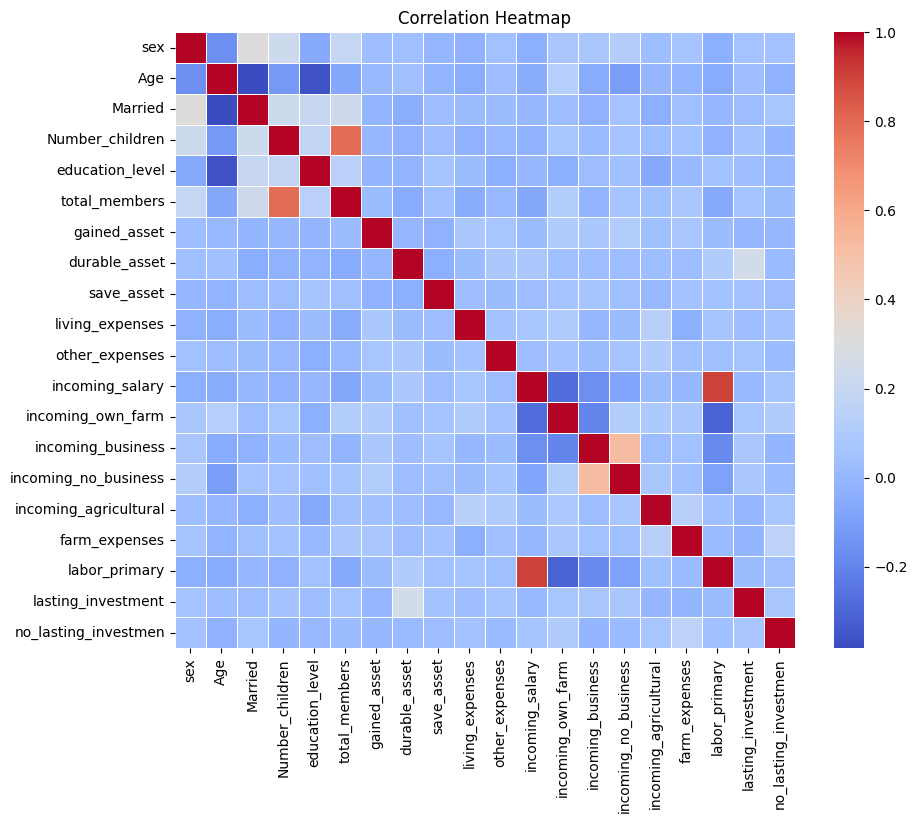

Selected Features: ['Age', 'Married', 'education_level', 'durable_asset', 'no_lasting_investmen']


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset from CSV file
df = pd.read_csv('output_file.csv')

# Separate features (X) and target variable (y)
X = df.drop('depressed', axis=1)  # Features
y = df['depressed']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute correlation matrix
corr_matrix = X_train.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Use SelectKBest to select top k features based on ANOVA F-value
k = 5  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get indices of selected features
selected_features_idx = selector.get_support(indices=True)

# Get names of selected features
selected_features = X.columns[selected_features_idx]
print("Selected Features:", selected_features.tolist())




### feature selection using embedded method

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset (replace 'dataset.csv' with your file path)
df = pd.read_csv('output_file.csv')

# Assuming 'target_column' is your target variable and other columns are features
X = df.drop('depressed', axis=1)
y = df['depressed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Use feature importances for feature selection
feature_importances = rf_classifier.feature_importances_

# Select features based on importance threshold
sfm = SelectFromModel(rf_classifier, threshold='median')
X_train_selected = sfm.fit_transform(X_train, y_train)
X_test_selected = sfm.transform(X_test)

# Get selected feature indices
selected_feature_indices = sfm.get_support(indices=True)

# Get selected feature names
selected_features = X.columns[selected_feature_indices]

# Train a new classifier on the selected features
rf_classifier_selected = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier_selected.fit(X_train_selected, y_train)

# Make predictions on the testing data using the selected features
y_pred = rf_classifier_selected.predict(X_test_selected)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Selected Features:", selected_features.tolist())
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Selected Features: ['Age', 'Number_children', 'education_level', 'durable_asset', 'living_expenses', 'other_expenses', 'incoming_agricultural', 'farm_expenses', 'lasting_investment', 'no_lasting_investmen']
Accuracy: 0.8181818181818182
Confusion Matrix:
 [[232   7]
 [ 45   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       239
           1       0.22      0.04      0.07        47

    accuracy                           0.82       286
   macro avg       0.53      0.51      0.49       286
weighted avg       0.74      0.82      0.76       286



### feature selection  using wrapper method utiliezing class weight balancing and Stratified cross-validation (svm classifier)

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the data from a CSV file into a DataFrame
df = pd.read_csv("output_file.csv")

# Replace 'target_column' with the name of your target column
X = df.drop('depressed', axis=1)  # Features
y = df['depressed']  # Target variable

# Feature scaling for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the SVM classifier
svm_classifier = SVC(kernel='linear')

# Initialize Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define parameter grid for hyperparameter tuning (C is the regularization parameter)
param_grid = {'C': [0.1, 1, 10, 100]}

best_accuracy = 0
best_features = []

# Iterate over all features
for feature_idx in range(X_scaled.shape[1]):
    # Train SVM with the current feature set using GridSearchCV
    grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, scoring='accuracy', cv=skf)
    
    # Define class weights manually based on the target variable
    class_counts = y.value_counts()
    class_weights = {cls: len(y) / (len(class_counts) * class_count) for cls, class_count in class_counts.items()}
    
    # Convert class weights to sample weights
    sample_weights = np.array([class_weights[cls] for cls in y])
    
    # Fit the classifier with sample weights
    grid_search.fit(X_scaled[:, feature_idx:feature_idx+1], y, sample_weight=sample_weights)
    
    # Check if the current feature set improves accuracy
    if grid_search.best_score_ > best_accuracy:
        best_accuracy = grid_search.best_score_
        best_features.append(feature_idx)

# Output the selected features and best accuracy
selected_feature_names = X.columns[best_features]
print("Selected features:", selected_feature_names)
print("Best accuracy:", best_accuracy)

Selected features: Index(['sex', 'Age', 'education_level', 'durable_asset'], dtype='object')
Best accuracy: 0.7683597104649735


## applying PCA to dataframe and inputting it to logistic regression model

#### applying PCA to dataframe selecting 2 principal components and inputting it to logistic regression model

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("output_file.csv")
# Assuming df is a pandas DataFrame with the relevant data
# Split the data into features (X) and target (y)
X = df[['sex','Age','Married','Number_children','education_level','total_members',
        'gained_asset','durable_asset','save_asset','living_expenses','other_expenses',
        'incoming_salary','incoming_own_farm','incoming_business','incoming_no_business',
        'incoming_agricultural','farm_expenses','labor_primary','lasting_investment',
        'no_lasting_investmen']]
y = df['depressed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize Logistic Regression model with class weight balancing
log_reg = LogisticRegression(class_weight='balanced')

# Fit the Logistic Regression model on PCA-transformed data
log_reg.fit(X_train_pca, y_train)

# Predictions
y_pred_train = log_reg.predict(X_train_pca)
y_pred_test = log_reg.predict(X_test_pca)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.5835520559930009
Testing Accuracy: 0.541958041958042


#### applying PCA to dataframe selecting 4 principal components and inputting it to logistic regression model

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("output_file.csv")
# Assuming df is a pandas DataFrame with the relevant data
# Split the data into features (X) and target (y)
X = df[['sex','Age','Married','Number_children','education_level','total_members',
        'gained_asset','durable_asset','save_asset','living_expenses','other_expenses',
        'incoming_salary','incoming_own_farm','incoming_business','incoming_no_business',
        'incoming_agricultural','farm_expenses','labor_primary','lasting_investment',
        'no_lasting_investmen']]
y = df['depressed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA(n_components=4)  # Specify the number of principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize Logistic Regression model with class weight balancing
log_reg = LogisticRegression(class_weight='balanced')

# Fit the Logistic Regression model on PCA-transformed data
log_reg.fit(X_train_pca, y_train)

# Predictions
y_pred_train = log_reg.predict(X_train_pca)
y_pred_test = log_reg.predict(X_test_pca)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.6089238845144357
Testing Accuracy: 0.583916083916084


### finding the optimal train test split for our algorithms

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

# Load your dataset
df = pd.read_csv('output_file.csv')

# Split the data into features (X) and target variable (y)
X = df[['sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members', 'gained_asset', 'durable_asset', 'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary', 'incoming_own_farm', 'incoming_business', 'incoming_no_business', 'incoming_agricultural', 'farm_expenses', 'labor_primary', 'lasting_investment', 'no_lasting_investmen']]
y = df['depressed']

# Define train-test split ratios to compare
test_sizes = [0.2, 0.3, 0.4]

# Initialize dictionaries to store results
f1_scores = {}
accuracy_scores = {}

for test_size in test_sizes:
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize and train a logistic regression model with class_weight='balanced'
    model = LogisticRegression(C=0.1, solver='liblinear', class_weight='balanced')  # Using best parameters from previous grid search
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate F1 score and accuracy
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Store scores in dictionaries
    f1_scores[test_size] = f1
    accuracy_scores[test_size] = accuracy

# Print F1 scores and accuracy for each test size
print("F1 Scores:")
for test_size, f1 in f1_scores.items():
    print(f"Test Size {test_size}: {f1}")

print("\nAccuracy Scores:")
for test_size, accuracy in accuracy_scores.items():
    print(f"Test Size {test_size}: {accuracy}")


F1 Scores:
Test Size 0.2: 0.21487603305785125
Test Size 0.3: 0.23645320197044334
Test Size 0.4: 0.22794117647058823

Accuracy Scores:
Test Size 0.2: 0.6678321678321678
Test Size 0.3: 0.6386946386946387
Test Size 0.4: 0.6328671328671329


### Logistic regression

In [34]:
# Import necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



df = pd.read_csv('output_file.csv')

# Splitting data into features (X) and target (y)
X = df[['sex','Age','Married','Number_children','education_level','total_members' ,'gained_asset','durable_asset','save_asset','living_expenses','other_expenses','incoming_salary','incoming_own_farm','incoming_business','incoming_no_business','incoming_agricultural','farm_expenses','labor_primary','lasting_investment','no_lasting_investmen']]
y = df['depressed']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8356643356643356
Confusion Matrix:
 [[239   0]
 [ 47   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       239
           1       0.00      0.00      0.00        47

    accuracy                           0.84       286
   macro avg       0.42      0.50      0.46       286
weighted avg       0.70      0.84      0.76       286



### Logistic Regression using best five columns
 

In [35]:
# Import necessary libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



df = pd.read_csv('output_file.csv')

# Splitting data into features (X) and target (y)
X = df[['Married', 'save_asset', 'living_expenses', 'incoming_salary', 'incoming_business']]
y = df['depressed']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8356643356643356
Confusion Matrix:
 [[239   0]
 [ 47   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       239
           1       0.00      0.00      0.00        47

    accuracy                           0.84       286
   macro avg       0.42      0.50      0.46       286
weighted avg       0.70      0.84      0.76       286



### a precision and recall of 0 in the 1s row suggests an imbalanced data set running the following code confirms our suspicion

depressed
0    1191
1     238
Name: count, dtype: int64


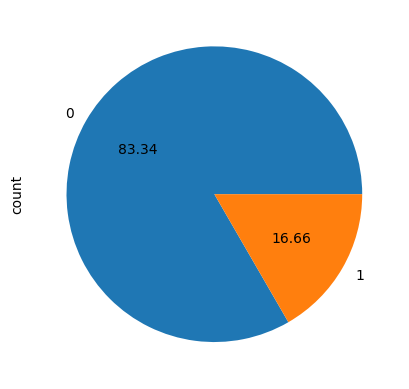

In [36]:
y.value_counts().plot.pie(autopct='%.2f')
print(y.value_counts())

### we have choosen class-weight balancing method (as it has a better performance than other methods) for balancing the dataset ,we will apply it to the rest of the algorithms

### logistic regression using class-weight balancing method (using best features)

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('output_file.csv')

# Splitting data into features (X) and target (y)
X = df[['sex', 'Married']]
y = df['depressed']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model with class weight balancing
model = LogisticRegression(class_weight='balanced')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.6958041958041958
Confusion Matrix:
 [[188  51]
 [ 36  11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       239
           1       0.18      0.23      0.20        47

    accuracy                           0.70       286
   macro avg       0.51      0.51      0.51       286
weighted avg       0.73      0.70      0.71       286



### logistic regression using class-weight balancing method (using best five features)

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('output_file.csv')

# Splitting data into features (X) and target (y)
X = df[['sex', 'Married', 'incoming_salary', 'incoming_business', 'labor_primary']]
y = df['depressed']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model with class weight balancing
model = LogisticRegression(class_weight='balanced')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.6923076923076923
Confusion Matrix:
 [[188  51]
 [ 37  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       239
           1       0.16      0.21      0.19        47

    accuracy                           0.69       286
   macro avg       0.50      0.50      0.50       286
weighted avg       0.73      0.69      0.71       286



### Logistic Regression with class-weight balancing with dropping 'sex' feature


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('output_file.csv')

# Splitting data into features (X) and target (y)
X = df[['Married', 'save_asset', 'living_expenses', 'incoming_salary', 'incoming_business']]
y = df['depressed']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model with class weight balancing
model = LogisticRegression(class_weight='balanced')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7202797202797203
Confusion Matrix:
 [[196  43]
 [ 37  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       239
           1       0.19      0.21      0.20        47

    accuracy                           0.72       286
   macro avg       0.51      0.52      0.52       286
weighted avg       0.73      0.72      0.73       286



### deploying logistic regression model with GUI

In [4]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

class LogisticRegressionGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Logistic Regression Model")

        # Create buttons for loading data and training model
        self.load_data_button = tk.Button(self.root, text="Load Dataset", command=self.load_dataset)
        self.load_data_button.pack(pady=20)

        self.train_model_button = tk.Button(self.root, text="Train Model", state=tk.DISABLED, command=self.train_model)
        self.train_model_button.pack(pady=10)

    def load_dataset(self):
        # Open file dialog to select CSV file
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if file_path:
            try:
                # Read dataset
                df = pd.read_csv(file_path)

                # Split data into features (X) and target (y)
                X = df[['Married', 'save_asset', 'living_expenses', 'incoming_salary', 'incoming_business']]
                y = df['depressed']

                # Split data into train and test sets
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                # Initialize logistic regression model with balanced class weights
                model = LogisticRegression(class_weight='balanced')

                # Train the model on the training data
                model.fit(X_train, y_train)

                # Enable train model button
                self.train_model_button.config(state=tk.NORMAL)

                # Store necessary data for evaluation
                self.model = model
                self.X_test = X_test
                self.y_test = y_test

                messagebox.showinfo("Success", "Dataset loaded successfully!")

            except Exception as e:
                messagebox.showerror("Error", f"An error occurred: {str(e)}")

    def train_model(self):
        # Make predictions on test data
        y_pred = self.model.predict(self.X_test)

        # Evaluate the model
        accuracy = accuracy_score(self.y_test, y_pred)
        conf_matrix = confusion_matrix(self.y_test, y_pred)
        class_report = classification_report(self.y_test, y_pred)

        # Display evaluation results
        messagebox.showinfo("Model Evaluation", 
                            f"Accuracy: {accuracy}\n\nConfusion Matrix:\n{conf_matrix}\n\nClassification Report:\n{class_report}")

if __name__ == "__main__":
    root = tk.Tk()
    app = LogisticRegressionGUI(root)
    root.mainloop()


### Logistic resgression with GUI and input variables

In [3]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('output_file.csv')

# Splitting data into features (X) and target (y)
X = df[['Married', 'save_asset', 'living_expenses', 'incoming_salary', 'incoming_business']]
y = df['depressed']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model with class weight balancing
model = LogisticRegression(class_weight='balanced')

# Train the model on the training data
model.fit(X_train, y_train)

def run_model():
    # Retrieve input values from text fields
    married = float(entry_married.get())
    save_asset = float(entry_save_asset.get())
    living_expenses = float(entry_living_expenses.get())
    incoming_salary = float(entry_incoming_salary.get())
    incoming_business = float(entry_incoming_business.get())
       
    # Pass input values to the model and get predictions
    input_data = np.array([[married, save_asset, living_expenses, incoming_salary, incoming_business]])
    prediction = model.predict(input_data)
       
    # Display the output in the GUI
    result_label.config(text=f"Prediction: {prediction}")

root = tk.Tk()
root.title("Depression Prediction")

# Create labels and entry fields for input
label_married = ttk.Label(root, text="Married:")
label_married.grid(row=0, column=0, sticky=tk.W)
entry_married = ttk.Entry(root)
entry_married.grid(row=0, column=1)

label_save_asset = ttk.Label(root, text="Save Asset:")
label_save_asset.grid(row=1, column=0, sticky=tk.W)
entry_save_asset = ttk.Entry(root)
entry_save_asset.grid(row=1, column=1)

label_living_expenses = ttk.Label(root, text="Living Expenses:")
label_living_expenses.grid(row=2, column=0, sticky=tk.W)
entry_living_expenses = ttk.Entry(root)
entry_living_expenses.grid(row=2, column=1)

label_incoming_salary = ttk.Label(root, text="Incoming Salary:")
label_incoming_salary.grid(row=3, column=0, sticky=tk.W)
entry_incoming_salary = ttk.Entry(root)
entry_incoming_salary.grid(row=3, column=1)

label_incoming_business = ttk.Label(root, text="Incoming Business:")
label_incoming_business.grid(row=4, column=0, sticky=tk.W)
entry_incoming_business = ttk.Entry(root)
entry_incoming_business.grid(row=4, column=1)

# Create a button to run the model
run_button = ttk.Button(root, text="Run Model", command=run_model)
run_button.grid(row=5, columnspan=2)

# Create a label to display the prediction
result_label = ttk.Label(root, text="")
result_label.grid(row=6, columnspan=2)

root.mainloop()

### Logistic Regression with class weight balancing  and stratified cross validation

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('output_file.csv')

# Splitting data into features (X) and target (y)
X = df[['Married', 'save_asset', 'living_expenses', 'incoming_salary', 'incoming_business']]
y = df['depressed']

# Initialize logistic regression model with class weight balancing
model = LogisticRegression(class_weight='balanced')

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store scores
cv_scores = []

# Perform stratified cross-validation
for train_index, test_index in stratified_kfold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores.append(accuracy)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", mean_cv_score)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Cross-validation scores: [0.3706293706293706, 0.7867132867132867, 0.6363636363636364, 0.7832167832167832, 0.4]
Mean cross-validation score: 0.5953846153846154
Accuracy: 0.7202797202797203
Confusion Matrix:
 [[196  43]
 [ 37  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       239
           1       0.19      0.21      0.20        47

    accuracy                           0.72       286
   macro avg       0.51      0.52      0.52       286
weighted avg       0.73      0.72      0.73       286



### logistic regression with leave one out cross validation and class weight balancing

In [43]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.utils.class_weight import compute_class_weight
import warnings

# Load the data from a CSV file into a DataFrame
df = pd.read_csv("output_file.csv")

# Replace 'target_column' with the name of your target column
X = df[['Married', 'save_asset', 'living_expenses', 'incoming_salary', 'incoming_business']]  # Features
y = df['depressed']  # Target variable

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=y.unique(), y=y)

# Initialize Leave-One-Out
loo = LeaveOneOut()

# Initialize empty lists to store metrics
accuracy_scores = []
conf_matrices = []
precisions = []

# Iterate through each split
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize and train your model with class weight balancing
    model = LogisticRegression(max_iter=1000, class_weight=dict(zip(y.unique(), class_weights)))
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    
    # Calculate precision
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning)  # Suppress UserWarnings
        precision = precision_score(y_test, y_pred, zero_division=1)
    precisions.append(precision)

# Calculate the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Average Accuracy:", avg_accuracy)

# Calculate the average confusion matrix
avg_conf_matrix = sum(conf_matrices) / len(conf_matrices)
print("Average Confusion Matrix:")
print(avg_conf_matrix)

# Calculate the average precision
avg_precision = sum(precisions) / len(precisions)
print("Average Precision:", avg_precision)

Average Accuracy: 0.6396081175647306
Average Confusion Matrix:
[[0.63960812 0.88663401]
 [0.75297411 0.63960812]]
Average Precision: 0.7529741077676697


### finding optimal hyperparameters for Random Forrest

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Load your dataset from CSV
df = pd.read_csv("output_file.csv")

# Assuming 'target_column' is the name of the column containing the target variable
X = df.drop('depressed', axis=1)  # Features
y = df['depressed']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),  # Random integer between 2 and 10
    'min_samples_leaf': randint(1, 5),    # Random integer between 1 and 4
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
                                    param_distributions=param_dist,
                                    n_iter=50,  # Number of parameter settings that are sampled
                                    scoring='accuracy',
                                    cv=5,
                                    verbose=1,
                                    n_jobs=-1,
                                    random_state=42)

# Perform the randomized search on training data
random_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found:")
print(random_search.best_params_)
print("Best accuracy on validation data: {:.4f}".format(random_search.best_score_))

# Evaluate the best model on the test set
best_rf_classifier = random_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.4f}".format(accuracy))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy on validation data: 0.8233
Accuracy on test set: 0.8287


### Random forest Algorithm

In [45]:
# Import necessary libraries
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils import class_weight

df = pd.read_csv("output_file.csv")
# Split the data into features (X) and target variable (y)
X = df[['sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members', 'gained_asset', 'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary', 'incoming_business', 'incoming_no_business', 'incoming_agricultural', 'farm_expenses', 'labor_primary', 'lasting_investment', 'no_lasting_investmen'
]]

y = df['depressed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=y_train.unique(), y=y_train)

# Initialize the Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=20,random_state=42, class_weight=dict(zip(y_train.unique(), class_weights)))

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Displaying additional evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)




Accuracy: 0.8251748251748252
Confusion Matrix:
 [[234   5]
 [ 45   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       239
           1       0.29      0.04      0.07        47

    accuracy                           0.83       286
   macro avg       0.56      0.51      0.49       286
weighted avg       0.75      0.83      0.77       286



 ### deploying Randomforest model with GUI

In [1]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import class_weight

class RandomForestClassifierGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Random Forest Classifier")

        # Create buttons for loading data and training model
        self.load_data_button = tk.Button(self.root, text="Load Dataset", command=self.load_dataset)
        self.load_data_button.pack(pady=20)

        self.train_model_button = tk.Button(self.root, text="Train Model", state=tk.DISABLED, command=self.train_model)
        self.train_model_button.pack(pady=10)

    def load_dataset(self):
        # Open file dialog to select CSV file
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if file_path:
            try:
                # Read dataset
                df = pd.read_csv(file_path)

                # Split data into features (X) and target (y)
                X = df[['sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members',
                        'gained_asset', 'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
                        'incoming_business', 'incoming_no_business', 'incoming_agricultural', 'farm_expenses',
                        'labor_primary', 'lasting_investment', 'no_lasting_investmen']]
                y = df['depressed']

                # Split data into train and test sets
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                # Calculate class weights
                class_weights = class_weight.compute_class_weight('balanced', classes=y_train.unique(), y=y_train)

                # Initialize the Random Forest classifier with class weights
                self.rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42,
                                                             class_weight=dict(zip(y_train.unique(), class_weights)))

                # Enable train model button
                self.train_model_button.config(state=tk.NORMAL)

                messagebox.showinfo("Success", "Dataset loaded successfully!")

            except Exception as e:
                messagebox.showerror("Error", f"An error occurred: {str(e)}")

    def train_model(self):
        try:
            # Train the model on the training data
            self.rf_classifier.fit(X_train, y_train)

            # Make predictions on the testing data
            y_pred = self.rf_classifier.predict(X_test)

            # Calculate the accuracy of the model
            accuracy = accuracy_score(y_test, y_pred)

            # Display evaluation metrics
            conf_matrix = confusion_matrix(y_test, y_pred)
            class_report = classification_report(y_test, y_pred)

            messagebox.showinfo("Model Evaluation",
                                f"Accuracy: {accuracy}\n\nConfusion Matrix:\n{conf_matrix}\n\nClassification Report:\n{class_report}")

        except Exception as e:
            messagebox.showerror("Error", f"An error occurred during model training: {str(e)}")

if __name__ == "__main__":
    root = tk.Tk()
    app = RandomForestClassifierGUI(root)
    root.mainloop()


### Random forest with GUI and input variables

In [2]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('output_file.csv')

# Define columns for features (X) and target (y)
feature_cols = [
    'sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members', 
    'gained_asset', 'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary', 
    'incoming_business', 'incoming_no_business', 'incoming_agricultural', 'farm_expenses', 
    'labor_primary', 'lasting_investment', 'no_lasting_investmen'
]
X = df[feature_cols]
y = df['depressed']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
model = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

def run_model():
    # Retrieve input values from text fields
    sex = float(entry_sex.get())
    age = float(entry_age.get())
    married = float(entry_married.get())
    num_children = float(entry_num_children.get())
    education_level = float(entry_education_level.get())
    total_members = float(entry_total_members.get())
    gained_asset = float(entry_gained_asset.get())
    save_asset = float(entry_save_asset.get())
    living_expenses = float(entry_living_expenses.get())
    other_expenses = float(entry_other_expenses.get())
    incoming_salary = float(entry_incoming_salary.get())
    incoming_business = float(entry_incoming_business.get())
    incoming_no_business = float(entry_incoming_no_business.get())
    incoming_agricultural = float(entry_incoming_agricultural.get())
    farm_expenses = float(entry_farm_expenses.get())
    labor_primary = float(entry_labor_primary.get())
    lasting_investment = float(entry_lasting_investment.get())
    no_lasting_investmen = float(entry_no_lasting_investmen.get())
       
    # Pass input values to the model and get predictions
    input_data = np.array([[
        sex, age, married, num_children, education_level, total_members, 
        gained_asset, save_asset, living_expenses, other_expenses, incoming_salary, 
        incoming_business, incoming_no_business, incoming_agricultural, farm_expenses, 
        labor_primary, lasting_investment,no_lasting_investmen]])
    prediction = model.predict(input_data)
       
    # Display the output in the GUI
    result_label.config(text=f"Prediction: {prediction}")

root = tk.Tk()
root.title("Depression Prediction")

# Create labels and entry fields for input
label_sex = ttk.Label(root, text="Sex (0 for Female, 1 for Male):")
label_sex.grid(row=0, column=0, sticky=tk.W)
entry_sex = ttk.Entry(root)
entry_sex.grid(row=0, column=1)

label_age = ttk.Label(root, text="Age:")
label_age.grid(row=1, column=0, sticky=tk.W)
entry_age = ttk.Entry(root)
entry_age.grid(row=1, column=1)

label_married = ttk.Label(root, text="Married (0 for No, 1 for Yes):")
label_married.grid(row=2, column=0, sticky=tk.W)
entry_married = ttk.Entry(root)
entry_married.grid(row=2, column=1)

label_num_children = ttk.Label(root, text="Number of Children:")
label_num_children.grid(row=3, column=0, sticky=tk.W)
entry_num_children = ttk.Entry(root)
entry_num_children.grid(row=3, column=1)

label_education_level = ttk.Label(root, text="Education Level:")
label_education_level.grid(row=4, column=0, sticky=tk.W)
entry_education_level = ttk.Entry(root)
entry_education_level.grid(row=4, column=1)

label_total_members = ttk.Label(root, text="Total Members in Household:")
label_total_members.grid(row=5, column=0, sticky=tk.W)
entry_total_members = ttk.Entry(root)
entry_total_members.grid(row=5, column=1)

label_gained_asset = ttk.Label(root, text="Gained Asset:")
label_gained_asset.grid(row=6, column=0, sticky=tk.W)
entry_gained_asset = ttk.Entry(root)
entry_gained_asset.grid(row=6, column=1)

label_save_asset = ttk.Label(root, text="Save Asset:")
label_save_asset.grid(row=7, column=0, sticky=tk.W)
entry_save_asset = ttk.Entry(root)
entry_save_asset.grid(row=7, column=1)

label_living_expenses = ttk.Label(root, text="Living Expenses:")
label_living_expenses.grid(row=8, column=0, sticky=tk.W)
entry_living_expenses = ttk.Entry(root)
entry_living_expenses.grid(row=8, column=1)

label_other_expenses = ttk.Label(root, text="Other Expenses:")
label_other_expenses.grid(row=9, column=0, sticky=tk.W)
entry_other_expenses = ttk.Entry(root)
entry_other_expenses.grid(row=9, column=1)

label_incoming_salary = ttk.Label(root, text="Incoming Salary:")
label_incoming_salary.grid(row=10, column=0, sticky=tk.W)
entry_incoming_salary = ttk.Entry(root)
entry_incoming_salary.grid(row=10, column=1)

label_incoming_business = ttk.Label(root, text="Incoming Business:")
label_incoming_business.grid(row=11, column=0, sticky=tk.W)
entry_incoming_business = ttk.Entry(root)
entry_incoming_business.grid(row=11, column=1)

label_incoming_no_business = ttk.Label(root, text="Incoming (No Business):")
label_incoming_no_business.grid(row=12, column=0, sticky=tk.W)
entry_incoming_no_business = ttk.Entry(root)
entry_incoming_no_business.grid(row=12, column=1)

label_incoming_agricultural = ttk.Label(root, text="Incoming (Agricultural):")
label_incoming_agricultural.grid(row=13, column=0, sticky=tk.W)
entry_incoming_agricultural = ttk.Entry(root)
entry_incoming_agricultural.grid(row=13, column=1)

label_farm_expenses = ttk.Label(root, text="Farm Expenses:")
label_farm_expenses.grid(row=14, column=0, sticky=tk.W)
entry_farm_expenses = ttk.Entry(root)
entry_farm_expenses.grid(row=14, column=1)

label_labor_primary = ttk.Label(root, text="Labor Primary (0 for No, 1 for Yes):")
label_labor_primary.grid(row=15, column=0, sticky=tk.W)
entry_labor_primary = ttk.Entry(root)
entry_labor_primary.grid(row=15, column=1)

label_lasting_investment = ttk.Label(root, text="Lasting Investment:")
label_lasting_investment.grid(row=16, column=0, sticky=tk.W)
entry_lasting_investment = ttk.Entry(root)
entry_lasting_investment.grid(row=16, column=1)

label_no_lasting_investmen = ttk.Label(root, text="No Lasting Investment:")
label_no_lasting_investmen.grid(row=17, column=0, sticky=tk.W)
entry_no_lasting_investmen = ttk.Entry(root)
entry_no_lasting_investmen.grid(row=17, column=1)

# Create a button to run the model
run_button = ttk.Button(root, text="Run Model", command=run_model)
run_button.grid(row=18, columnspan=2)

# Create a label to display the prediction
result_label = ttk.Label(root, text="")
result_label.grid(row=19, columnspan=2)

root.mainloop()


c:\Users\A.H\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


###  applying Hold out cross validation on Random forest

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Load the data from a CSV file into a DataFrame
df = pd.read_csv("output_file.csv")

# Split the data into features (X) and target variable (y)
X = df[['sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members', 'gained_asset', 'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary', 'incoming_business', 'incoming_no_business', 'incoming_agricultural', 'farm_expenses', 'labor_primary', 'lasting_investment', 'no_lasting_investmen']]

y = df['depressed']

# Split the data into training and testing sets  "train split work the same as hold_out cross validation"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,)

# Calculate class weights
class_counts = y_train.value_counts()
class_weights = {cls: len(y_train) / (len(class_counts) * class_count) for cls, class_count in class_counts.items()}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42 ,class_weight=class_weights)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Hold-out Validation Accuracy with Class Weighting:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Displaying additional evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Hold-out Validation Accuracy with Class Weighting: 0.8321678321678322
Confusion Matrix:
 [[236   3]
 [ 45   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       239
           1       0.40      0.04      0.08        47

    accuracy                           0.83       286
   macro avg       0.62      0.52      0.49       286
weighted avg       0.77      0.83      0.77       286



###  applying Hold out cross validation on Random forest with the optimised hyperparameters

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data from a CSV file into a DataFrame
df = pd.read_csv("output_file.csv")

# Split the data into features (X) and target variable (y)
X = df[['sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members', 'gained_asset', 'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary', 'incoming_business', 'incoming_no_business', 'incoming_agricultural', 'farm_expenses', 'labor_primary', 'lasting_investment', 'no_lasting_investmen']]
y = df['depressed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights
class_counts = y_train.value_counts()
class_weights = {cls: len(y_train) / (len(class_counts) * class_count) for cls, class_count in class_counts.items()}

# Initialize the Random Forest classifier with the specified hyperparameters
rf_classifier = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=50,
    random_state=42,
    class_weight=class_weights
)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Hold-out Validation Accuracy with Class Weighting:", accuracy)

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Displaying additional evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Hold-out Validation Accuracy with Class Weighting: 0.8251748251748252
Confusion Matrix:
 [[234   5]
 [ 45   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       239
           1       0.29      0.04      0.07        47

    accuracy                           0.83       286
   macro avg       0.56      0.51      0.49       286
weighted avg       0.75      0.83      0.77       286



###  applying k fold cross validation on Random forest

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Load the data from a CSV file into a DataFrame
df = pd.read_csv("output_file.csv")

# Split the data into features (X) and target variable (y)
X = df[['sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members', 'gained_asset', 'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary', 'incoming_business', 'incoming_no_business', 'incoming_agricultural', 'farm_expenses', 'labor_primary', 'lasting_investment', 'no_lasting_investmen']]

y = df['depressed']

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Perform k_fold cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("k_fold Cross-Validation Scores with Class Weighting:", cv_scores)
print("Average k_fold Cross-Validation Accuracy with Class Weighting:", cv_scores.mean())



k_fold Cross-Validation Scores with Class Weighting: [0.82867133 0.82517483 0.82517483 0.79020979 0.82105263]
Average k_fold Cross-Validation Accuracy with Class Weighting: 0.8180566801619433


## SVM Algorithm

### attempting a grid search took too much time to run and used up too many resources thus we resorted to using manual search

### svm algorithm with different kernel values

##### using sigmoid kernel

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load the data from a CSV file into a DataFrame
df = pd.read_csv("output_file.csv")

# Replace 'selected_feature_names' with the names of your selected features
X = df[['sex', 'Age', 'education_level', 'durable_asset']]  # Selected features
y = df['depressed']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM classifier with balanced class weights
class_counts = y_train.value_counts()
class_weights = {cls: len(y_train) / (len(class_counts) * class_count) for cls, class_count in class_counts.items()}
svm_classifier = SVC(kernel='sigmoid', class_weight=class_weights)

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Evaluate the accuracy on the testing data
accuracy = svm_classifier.score(X_test_scaled, y_test)
print("Accuracy on testing data:", accuracy)

# Calculate confusion matrix on testing data
y_pred = svm_classifier.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix on testing data:")
print(conf_matrix)


Accuracy on testing data: 0.5559440559440559
Confusion Matrix on testing data:
[[137 102]
 [ 25  22]]


#### using rbf kernel

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load the data from a CSV file into a DataFrame
df = pd.read_csv("output_file.csv")

# Replace 'selected_feature_names' with the names of your selected features
X = df[['sex', 'Age', 'education_level', 'durable_asset']]  # Selected features
y = df['depressed']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM classifier with balanced class weights
class_counts = y_train.value_counts()
class_weights = {cls: len(y_train) / (len(class_counts) * class_count) for cls, class_count in class_counts.items()}
svm_classifier = SVC(kernel='rbf', class_weight=class_weights)

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Evaluate the accuracy on the testing data
accuracy = svm_classifier.score(X_test_scaled, y_test)
print("Accuracy on testing data:", accuracy)

# Calculate confusion matrix on testing data
y_pred = svm_classifier.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix on testing data:")
print(conf_matrix)


Accuracy on testing data: 0.534965034965035
Confusion Matrix on testing data:
[[137 102]
 [ 31  16]]


#### using linear kernel

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load the data from a CSV file into a DataFrame
df = pd.read_csv("output_file.csv")

# Replace 'selected_feature_names' with the names of your selected features
X = df[['sex', 'Age', 'education_level', 'durable_asset']]  # Selected features
y = df['depressed']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM classifier with balanced class weights
class_counts = y_train.value_counts()
class_weights = {cls: len(y_train) / (len(class_counts) * class_count) for cls, class_count in class_counts.items()}
svm_classifier = SVC(kernel='linear', class_weight=class_weights)

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Evaluate the accuracy on the testing data
accuracy = svm_classifier.score(X_test_scaled, y_test)
print("Accuracy on testing data:", accuracy)

# Calculate confusion matrix on testing data
y_pred = svm_classifier.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix on testing data:")
print(conf_matrix)


Accuracy on testing data: 0.6573426573426573
Confusion Matrix on testing data:
[[177  62]
 [ 36  11]]


#### using poly kernel

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load the data from a CSV file into a DataFrame
df = pd.read_csv("output_file.csv")

# Replace 'selected_feature_names' with the names of your selected features
X = df[['sex', 'Age', 'education_level', 'durable_asset']]  # Selected features
y = df['depressed']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVM classifier with balanced class weights
class_counts = y_train.value_counts()
class_weights = {cls: len(y_train) / (len(class_counts) * class_count) for cls, class_count in class_counts.items()}
svm_classifier = SVC(kernel='poly', class_weight=class_weights)

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Evaluate the accuracy on the testing data
accuracy = svm_classifier.score(X_test_scaled, y_test)
print("Accuracy on testing data:", accuracy)

# Calculate confusion matrix on testing data
y_pred = svm_classifier.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix on testing data:")
print(conf_matrix)


Accuracy on testing data: 0.7482517482517482
Confusion Matrix on testing data:
[[207  32]
 [ 40   7]]


### Applying stratified cross validation to SVM 

In [52]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('output_file.csv')

# Separate features and target
X = data.drop(columns=['depressed'])
y = data['depressed']

# Define the SVM model with class weight balancing

svm_model = SVC(class_weight='balanced')

# Create a pipeline with StandardScaler and SVM
pipeline = make_pipeline(StandardScaler(), svm_model)

# Define Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store cumulative results
accuracy_scores = []
cumulative_confusion_matrix = None

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    if cumulative_confusion_matrix is None:
        cumulative_confusion_matrix = conf_matrix
    else:
        cumulative_confusion_matrix += conf_matrix

# Calculate the mean cross-validation accuracy
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Fit the model on the entire dataset
pipeline.fit(X, y)

# Make predictions on the entire dataset
y_pred_full = pipeline.predict(X)

# Calculate the accuracy on the entire dataset
model_accuracy = accuracy_score(y, y_pred_full)

# Print the mean cross-validation accuracy
print(f'Mean cross-validation accuracy: {mean_accuracy}')

# Print the accuracy of the model on the entire dataset
print(f'Model accuracy on entire dataset: {model_accuracy}')

# Print the cumulative confusion matrix
print('Cumulative Confusion Matrix:')
print(cumulative_confusion_matrix)

Mean cross-validation accuracy: 0.6731885658201447
Model accuracy on entire dataset: 0.8229531140657803
Cumulative Confusion Matrix:
[[891 300]
 [167  71]]


### Applying stratified cross validation to SVM (poly kernel)

In [53]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('output_file.csv')

# Separate features and target
X = data.drop(columns=['depressed'])
y = data['depressed']

# Define the SVM model with class weight balancing

svm_model = SVC( kernel=  'poly',class_weight='balanced')

# Create a pipeline with StandardScaler and SVM
pipeline = make_pipeline(StandardScaler(), svm_model)

# Define Stratified K-Folds cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store cumulative results
accuracy_scores = []
cumulative_confusion_matrix = None

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    if cumulative_confusion_matrix is None:
        cumulative_confusion_matrix = conf_matrix
    else:
        cumulative_confusion_matrix += conf_matrix

# Calculate the mean cross-validation accuracy
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)

# Fit the model on the entire dataset
pipeline.fit(X, y)

# Make predictions on the entire dataset
y_pred_full = pipeline.predict(X)

# Calculate the accuracy on the entire dataset
model_accuracy = accuracy_score(y, y_pred_full)

# Print the mean cross-validation accuracy
print(f'Mean cross-validation accuracy: {mean_accuracy}')

# Print the accuracy of the model on the entire dataset
print(f'Model accuracy on entire dataset: {model_accuracy}')

# Print the cumulative confusion matrix
print('Cumulative Confusion Matrix:')
print(cumulative_confusion_matrix)

Mean cross-validation accuracy: 0.7291792418108207
Model accuracy on entire dataset: 0.8838348495451365
Cumulative Confusion Matrix:
[[1001  190]
 [ 197   41]]


###  applying GUI to SVM

In [54]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from tkinter import Tk, Label, Entry, Button

# Load the dataset
data = pd.read_csv('output_file.csv')

# Separate features and target
X = data.drop(columns=['depressed'])
y = data['depressed']

# Define the SVM model with class weight balancing
svm_model = SVC(kernel=  'poly',class_weight='balanced')

# Fit the model on the entire dataset
svm_model.fit(X, y)

# Function to make predictions
def predict():
    # Get input values from Entry widgets
    values = [entry.get() for entry in entries]
    # Convert values to float
    values = [float(val) for val in values]
    # Reshape input values to match the model's input shape
    input_data = [values]
    # Standardize input data
    input_data = scaler.transform(input_data)
    # Make prediction
    prediction = svm_model.predict(input_data)
    # Display prediction
    result_label.config(text=f"Prediction: {'Depressed' if prediction[0] == 1 else 'Not Depressed'}")

# Initialize Tkinter
root = Tk()
root.title("Depression Prediction")

# Create Entry widgets for input values
labels = ['Sex', 'Age', 'Married', 'Number of Children', 'Education Level', 'Total Members',
          'Gained Asset', 'Durable Asset', 'Save Asset', 'Living Expenses', 'Other Expenses',
          'Incoming Salary', 'Incoming Own Farm', 'Incoming Business', 'Incoming No Business',
          'Incoming Agricultural', 'Farm Expenses', 'Labor Primary', 'Lasting Investment',
          'No Lasting Investment']
entries = []
for i, label_text in enumerate(labels):
    label = Label(root, text=label_text)
    label.grid(row=i, column=0)
    entry = Entry(root)
    entry.grid(row=i, column=1)
    entries.append(entry)

# Create a button to submit inputs
submit_button = Button(root, text="Submit", command=predict)
submit_button.grid(row=len(labels), columnspan=2)

# Create a label to display the prediction result
result_label = Label(root, text="")
result_label.grid(row=len(labels)+1, columnspan=2)

# Fit StandardScaler on the entire dataset
scaler = StandardScaler()
scaler.fit(X)

# Start the Tkinter event loop
root.mainloop()

###  Decision tree algorithm

##### at randomstate=42

In [55]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

df = pd.read_csv("output_file.csv")

# Split the data into features (X) and target variable (y)
X = df[['Age', 'Number_children', 'education_level', 'durable_asset', 'living_expenses', 'other_expenses', 'incoming_agricultural', 'farm_expenses', 'lasting_investment', 'no_lasting_investmen']]

y = df['depressed']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier 
clf = DecisionTreeClassifier( random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluating the performance of the classifier
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


# Displaying additional evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)





Accuracy: 0.7167832167832168
Confusion Matrix:
 [[198  41]
 [ 40   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       239
           1       0.15      0.15      0.15        47

    accuracy                           0.72       286
   macro avg       0.49      0.49      0.49       286
weighted avg       0.72      0.72      0.72       286



##### at randomstate=100

In [56]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

df = pd.read_csv("output_file.csv")

# Split the data into features (X) and target variable (y)
X = df[['Age', 'Number_children', 'education_level', 'durable_asset', 'living_expenses', 'other_expenses', 'incoming_agricultural', 'farm_expenses', 'lasting_investment', 'no_lasting_investmen']]

y = df['depressed']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initialize the Decision Tree Classifier 
clf = DecisionTreeClassifier( random_state=100)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluating the performance of the classifier
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


# Displaying additional evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)





Accuracy: 0.7447552447552448
Confusion Matrix:
 [[204  42]
 [ 31   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       246
           1       0.18      0.23      0.20        40

    accuracy                           0.74       286
   macro avg       0.52      0.53      0.52       286
weighted avg       0.77      0.74      0.76       286



### Decision tree model with class weight balancing

In [57]:

# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv("output_file.csv")

# Split the data into features (X) and target variable (y)
X = df[['Age', 'Number_children', 'education_level', 'durable_asset', 'living_expenses', 'other_expenses', 'incoming_agricultural', 'farm_expenses', 'lasting_investment', 'no_lasting_investmen']]
            
y = df['depressed']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with class_weight='balanced'
clf = DecisionTreeClassifier( random_state=42,class_weight='balanced')

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluating the performance of the classifier
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


# Displaying additional evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.7482517482517482
Confusion Matrix:
 [[207  32]
 [ 40   7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       239
           1       0.18      0.15      0.16        47

    accuracy                           0.75       286
   macro avg       0.51      0.51      0.51       286
weighted avg       0.73      0.75      0.74       286



###  applying stratified cross validation to Decision tree algorithm 

In [58]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load the data
df = pd.read_csv("output_file.csv")

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['depressed'])
y = df['depressed']

# Initialize the Decision Tree Classifier with class_weight='balanced'
clf = DecisionTreeClassifier( random_state=42,class_weight='balanced')

# Define the stratified k-fold cross-validator
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation metrics
accuracies = []
confusion_matrices = []
classification_reports = []

# Perform stratified k-fold cross-validation
for train_index, test_index in strat_k_fold.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred = clf.predict(X_test)
    
    # Calculate and store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    # Calculate and store confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)
    
    # Calculate and store classification report (not averaged)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(class_report)

# Calculate the average accuracy
average_accuracy = sum(accuracies) / len(accuracies)

# Calculate the average confusion matrix
average_conf_matrix = np.mean(confusion_matrices, axis=0)

# Display the average accuracy
print("Average Accuracy:", average_accuracy)

# Display the average confusion matrix
print("Average Confusion Matrix:\n", average_conf_matrix)

# Note: Classification reports are not averaged as their structure is more complex.


Average Accuracy: 0.7180100601153233
Average Confusion Matrix:
 [[197.6  40.6]
 [ 40.    7.6]]


### Naïve Bayes model with  class weight balancing


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight

# Load the data from CSV file
df = pd.read_csv('output_file.csv')

# Assuming 'depressed' is the target variable and other columns are features
X = df.drop(columns=['depressed'])
y = df['depressed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute sample weights to handle class imbalance
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Initialize the Gaussian Naive Bayes model
clf = GaussianNB()

# Fit the model with sample weights
clf.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.6818181818181818
Confusion Matrix:
 [[181  58]
 [ 33  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       239
           1       0.19      0.30      0.24        47

    accuracy                           0.68       286
   macro avg       0.52      0.53      0.52       286
weighted avg       0.74      0.68      0.71       286



# finding bagging best hyperparameters 

#### we have choosen the apropriate n estimators by trial and error

#### Bagging Technique

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data
df = pd.read_csv("output_file.csv")

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['depressed'])
y = df['depressed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
base_model1 = DecisionTreeClassifier(class_weight='balanced')
base_model2 = LogisticRegression(class_weight='balanced')
base_model3 = SVC(class_weight='balanced')
base_model4 = RandomForestClassifier(class_weight='balanced')

# Initialize Bagging classifiers with multiple base models
bagging_DT = BaggingClassifier(base_model1, n_estimators=50, random_state=42)
bagging_LR = BaggingClassifier(base_model2, n_estimators=50, random_state=42)
bagging_SVM = BaggingClassifier(base_model3, n_estimators=50, random_state=42)
bagging_RF = BaggingClassifier(base_model4, n_estimators=50, random_state=42)

# Train and evaluate Bagging classifiers
def train_and_evaluate_bagging(bagging_model, model_name):
    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy with", model_name, ":", accuracy)
    print("Confusion Matrix with", model_name, ":\n", confusion_matrix(y_test, y_pred))
    print("Classification Report with", model_name, ":\n", classification_report(y_test, y_pred))
    return accuracy

print("Training and evaluating Bagging with Decision Tree...")
accuracy_DT = train_and_evaluate_bagging(bagging_DT, "Decision Tree")

print("\nTraining and evaluating Bagging with Logistic Regression...")
accuracy_LR = train_and_evaluate_bagging(bagging_LR, "Logistic Regression")

print("\nTraining and evaluating Bagging with SVM...")
accuracy_SVM = train_and_evaluate_bagging(bagging_SVM, "SVM")

print("\nTraining and evaluating Bagging with Random Forest...")
accuracy_RF = train_and_evaluate_bagging(bagging_RF, "Random Forest")

# Calculate total accuracy
total_accuracy = (accuracy_DT + accuracy_LR + accuracy_SVM + accuracy_RF) / 4
print("\nTotal Accuracy:", total_accuracy)


Training and evaluating Bagging with Decision Tree...
Accuracy with Decision Tree : 0.8286713286713286
Confusion Matrix with Decision Tree :
 [[235   4]
 [ 45   2]]
Classification Report with Decision Tree :
               precision    recall  f1-score   support

           0       0.84      0.98      0.91       239
           1       0.33      0.04      0.08        47

    accuracy                           0.83       286
   macro avg       0.59      0.51      0.49       286
weighted avg       0.76      0.83      0.77       286


Training and evaluating Bagging with Logistic Regression...
Accuracy with Logistic Regression : 0.5524475524475524
Confusion Matrix with Logistic Regression :
 [[141  98]
 [ 30  17]]
Classification Report with Logistic Regression :
               precision    recall  f1-score   support

           0       0.82      0.59      0.69       239
           1       0.15      0.36      0.21        47

    accuracy                           0.55       286
   macro avg

### Boosting Technique

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shutup;shutup.please()
# Load data
df = pd.read_csv("output_file.csv")

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['depressed'])
y = df['depressed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models with class weight balancing
base_model1 = DecisionTreeClassifier(class_weight='balanced')
base_model2 = LogisticRegression(class_weight='balanced')
base_model3 = GaussianNB()  # Naive Bayes doesn't support class_weight directly

# Initialize the AdaBoost classifier with multiple base models
clf_boosting_tree = AdaBoostClassifier(base_model1, n_estimators=50, random_state=42)
clf_boosting_logistic = AdaBoostClassifier(base_model2, n_estimators=50, random_state=42)
clf_boosting_naive = AdaBoostClassifier(base_model3, n_estimators=50, random_state=42)

# Train the models on the training data
clf_boosting_tree.fit(X_train, y_train)
clf_boosting_logistic.fit(X_train, y_train)
clf_boosting_naive.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_tree = clf_boosting_tree.predict(X_test)
y_pred_logistic = clf_boosting_logistic.predict(X_test)
y_pred_naive = clf_boosting_naive.predict(X_test)

# Calculate the accuracy of the models
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_naive = accuracy_score(y_test, y_pred_naive)

# Print accuracy for each model
print("Accuracy WITH Decision Tree:", accuracy_tree)
print("Accuracy WITH Logistic Regression:", accuracy_logistic)
print("Accuracy WITH Gaussian Naive Bayes:", accuracy_naive)
# Calculate total accuracy
total_accuracy = (accuracy_tree + accuracy_logistic + accuracy_naive) / 3

print("Total Accuracy:", total_accuracy)


Accuracy WITH Decision Tree: 0.7027972027972028
Accuracy WITH Logistic Regression: 0.5104895104895105
Accuracy WITH Gaussian Naive Bayes: 0.8216783216783217
Total Accuracy: 0.6783216783216783


### voting algorithm

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils import class_weight

df = pd.read_csv("output_file.csv")

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['depressed'])
y = df['depressed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
# Calculate class weights to handle class imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=y.unique(), y=y)

# Initialize base models
base_model1 = SVC(probability=True, random_state=42, class_weight=dict(zip(y.unique(), class_weights)))
base_model2 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=dict(zip(y.unique(), class_weights)))
base_model3 = GaussianNB()

# Initialize Voting classifier with different base models
voting_classifier = VotingClassifier(estimators=[
    ('svm', base_model1),
    ('random_forest', base_model2),
    ('naive_bayes', base_model3)]
    , voting='hard')  # Use 'hard' voting for majority rule

# Train Voting classifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_voting = voting_classifier.predict(X_test)

# Calculate the accuracy of the Voting classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)

print("Accuracy of Voting Ensemble:", accuracy_voting*100)


conf_matrix = confusion_matrix(y_test, y_pred_voting)
class_report = classification_report(y_test, y_pred_voting)

# Displaying additional evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy of Voting Ensemble: 82.86713286713287
Confusion Matrix:
 [[236   3]
 [ 46   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       239
           1       0.25      0.02      0.04        47

    accuracy                           0.83       286
   macro avg       0.54      0.50      0.47       286
weighted avg       0.74      0.83      0.76       286



### stacking algorithm

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.ensemble import BalancedRandomForestClassifier
import shutup;shutup.please()

df = pd.read_csv("output_file.csv")

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['depressed'])
y = df['depressed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models with class weight balancing
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)),
    ('svc', SVC(probability=True, class_weight='balanced', random_state=42))
]

# Initialize the Stacking Classifier with multiple base models
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=BalancedRandomForestClassifier(n_estimators=100, random_state=42))

# Train the model on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = stacking_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Displaying additional evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.5944055944055944
Confusion Matrix:
 [[146  93]
 [ 23  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.61      0.72       239
           1       0.21      0.51      0.29        47

    accuracy                           0.59       286
   macro avg       0.53      0.56      0.50       286
weighted avg       0.76      0.59      0.65       286

